# **Data Cleaning (Refer to Part 1)** 

In [ ]:
import pandas as pd

In [ ]:
df_preprocessing = pd.read_csv('sentiment_analysis(1).csv')

In [ ]:
df = df_preprocessing.copy()
df

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
# ignore warnings to clean up the output area

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# now, we will start processing the text
# step 1: remove links from the text

import re
def remove_url(text):
    urlfree = re.sub(r'http\S+', '', text)
    return urlfree
df['url_free']=df['text'].apply(lambda x:remove_url(x))
df.head()

,ID,text,label,url_free
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...


In [ ]:
# step 2: remove punctuations from the text

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text

df['clean_msg']= df['url_free'].apply(lambda x:remove_punctuation(x))
df.head()

,ID,text,label,url_free,clean_msg
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...


In [ ]:
# step 3: change text to lower case letters

df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

,ID,text,label,url_free,clean_msg,msg_lower
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...,rt mianusmanjaved congratulations pakistan on ...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...,rt pepalerts this september yesmag is taking y...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...,rt davidgaibis newly painted walls thanks a mi...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...,rt cedricfeschotte excited to announce as of j...


In [ ]:
import nltk

#Stop words present in the library

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# we remove all punctuations from text, so we need to remove punctuations from the stopword list as well 

stop_series=pd.Series(stopwords)
stopwords_new=stop_series.apply(lambda x:remove_punctuation(x))
stopwords_new=list(stopwords_new)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jialinshang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# step 4: tokenize the text

from nltk.tokenize import word_tokenize

nltk.download('punkt')
df['msg_tokenied']= df['msg_lower'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jialinshang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,text,label,url_free,clean_msg,msg_lower,msg_tokenied
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, is, looking, forward, to, tab,..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...,rt mianusmanjaved congratulations pakistan on ...,"[rt, mianusmanjaved, congratulations, pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...,rt pepalerts this september yesmag is taking y...,"[rt, pepalerts, this, september, yesmag, is, t..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...,rt davidgaibis newly painted walls thanks a mi...,"[rt, davidgaibis, newly, painted, walls, thank..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...,rt cedricfeschotte excited to announce as of j...,"[rt, cedricfeschotte, excited, to, announce, a..."


In [ ]:
%%time

# step 5: remove stopwords from tokenized text
#defining the function to remove stopwords from tokenized text

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords_new]
    return output

# applying the function

df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df.head()

CPU times: user 11 s, sys: 162 ms, total: 11.1 s
Wall time: 11.4 s


,ID,text,label,url_free,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, is, looking, forward, to, tab,...","[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...,rt mianusmanjaved congratulations pakistan on ...,"[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulations, pakistan..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...,rt pepalerts this september yesmag is taking y...,"[rt, pepalerts, this, september, yesmag, is, t...","[rt, pepalerts, september, yesmag, taking, mai..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...,rt davidgaibis newly painted walls thanks a mi...,"[rt, davidgaibis, newly, painted, walls, thank...","[rt, davidgaibis, newly, painted, walls, thank..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...,rt cedricfeschotte excited to announce as of j...,"[rt, cedricfeschotte, excited, to, announce, a...","[rt, cedricfeschotte, excited, announce, july,..."


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jialinshang/nltk_data...


True

In [ ]:
# compared to steming, lemmatizing will not change the meaning of the words
# step 6: lemmatize the tokenized words

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#defining the object for Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['msg_lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jialinshang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,ID,text,label,url_free,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_lemmatized
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, is, looking, forward, to, tab,...","[josh, jenkins, looking, forward, tab, breeder...","[josh, jenkins, looking, forward, tab, breeder..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...,rt mianusmanjaved congratulations pakistan on ...,"[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulation, pakistan,..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...,rt pepalerts this september yesmag is taking y...,"[rt, pepalerts, this, september, yesmag, is, t...","[rt, pepalerts, september, yesmag, taking, mai...","[rt, pepalerts, september, yesmag, taking, mai..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...,rt davidgaibis newly painted walls thanks a mi...,"[rt, davidgaibis, newly, painted, walls, thank...","[rt, davidgaibis, newly, painted, walls, thank...","[rt, davidgaibis, newly, painted, wall, thanks..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...,rt cedricfeschotte excited to announce as of j...,"[rt, cedricfeschotte, excited, to, announce, a...","[rt, cedricfeschotte, excited, announce, july,...","[rt, cedricfeschotte, excited, announce, july,..."


In [ ]:
# step 7: detokenize the words - prepared for tf-idf process 

from nltk.tokenize.treebank import TreebankWordDetokenizer

df['detokenized']=df['msg_lemmatized'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))
df.head()

,ID,text,label,url_free,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_lemmatized,detokenized
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, is, looking, forward, to, tab,...","[josh, jenkins, looking, forward, tab, breeder...","[josh, jenkins, looking, forward, tab, breeder...",josh jenkins looking forward tab breeder crown...
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT MianUsmanJaved Congratulations Pakistan on ...,rt mianusmanjaved congratulations pakistan on ...,"[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulations, pakistan...","[rt, mianusmanjaved, congratulation, pakistan,...",rt mianusmanjaved congratulation pakistan beco...
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...",RT PEPalerts This September YESmag is taking y...,rt pepalerts this september yesmag is taking y...,"[rt, pepalerts, this, september, yesmag, is, t...","[rt, pepalerts, september, yesmag, taking, mai...","[rt, pepalerts, september, yesmag, taking, mai...",rt pepalerts september yesmag taking maine men...
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...",RT davidgaibis Newly painted walls thanks a mi...,rt davidgaibis newly painted walls thanks a mi...,"[rt, davidgaibis, newly, painted, walls, thank...","[rt, davidgaibis, newly, painted, walls, thank...","[rt, davidgaibis, newly, painted, wall, thanks...",rt davidgaibis newly painted wall thanks milli...
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT CedricFeschotte Excited to announce as of J...,rt cedricfeschotte excited to announce as of j...,"[rt, cedricfeschotte, excited, to, announce, a...","[rt, cedricfeschotte, excited, announce, july,...","[rt, cedricfeschotte, excited, announce, july,...",rt cedricfeschotte excited announce july 2017 ...


In [ ]:
# the final dataframe: we will continue working on the detokenized text

df_clean=pd.concat([df['label'],df['detokenized']],axis=1)
df_clean

,label,detokenized
0,1,josh jenkins looking forward tab breeder crown...
1,1,rt mianusmanjaved congratulation pakistan beco...
2,1,rt pepalerts september yesmag taking maine men...
3,1,rt davidgaibis newly painted wall thanks milli...
4,1,rt cedricfeschotte excited announce july 2017 ...
...,...,...
550386,0,goddesseso cant stop watching hermm
550387,0,poor old tom odell look like would know wrong ...
550388,1,antsmasher smashed 7 ant awesome gamehjfjfi
550389,1,lizhudston kymwyllie evasmiless meanbok linddy...


In [ ]:
# prepare data using TF-IDF method
# we will use the function from sklearn library 
# here we choose to use the top 250 features (words) to classify the text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=250)
vectors = vectorizer.fit_transform(df['detokenized'])
feature_names = vectorizer.get_feature_names_out()

In [ ]:
feature_names

array(['10', '100', '2016', 'also', 'always', 'amazing', 'amp', 'another',
       'art', 'as', 'awesome', 'baby', 'back', 'bad', 'bday', 'beautiful',
       'believe', 'best', 'better', 'big', 'birthday', 'bitch', 'black',
       'blessed', 'book', 'boy', 'call', 'cant', 'check', 'child',
       'christmas', 'come', 'coming', 'congrats', 'congratulation',
       'cook', 'cool', 'could', 'cry', 'cute', 'damn', 'day', 'dead',
       'deal', 'death', 'die', 'dog', 'done', 'encounter', 'enjoy',
       'even', 'ever', 'every', 'everyone', 'everything', 'excited',
       'face', 'family', 'fan', 'fantastic', 'favorite', 'feel',
       'feeling', 'finally', 'find', 'first', 'follow', 'food', 'forget',
       'found', 'free', 'friday', 'friend', 'fuck', 'fucking', 'full',
       'fun', 'funny', 'game', 'get', 'getting', 'gift', 'girl', 'give',
       'go', 'god', 'going', 'gonna', 'good', 'gorgeous', 'got', 'great',
       'guy', 'happy', 'hard', 'hate', 'he', 'heart', 'help', 'here',
       '

In [ ]:
%%time

# convert the vectors to TF-IDF matrix

dense = vectors.todense()
denselist = dense.tolist()
df_feature = pd.DataFrame(denselist, columns=feature_names)
df_feature

CPU times: user 33.7 s, sys: 9.94 s, total: 43.7 s
Wall time: 49.5 s


,10,100,2016,also,always,amazing,amp,another,art,as,...,woman,wonderful,work,world,would,wow,wrong,yall,year,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.626801,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
550387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.423918,0.0,0.481675,0.0,0.0,0.0
550388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
550389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.525195,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# store dataframes to csv files and we will work on them in separate notebook because the previous 
# calculations are taking up most of the RAM
# store the feature dataframe

df_feature.to_csv('project_part1_df_feature.csv')

In [ ]:
# store the cleaned dataframe with target and detokenized text

df_clean.to_csv('project_part1_df_clean.csv')

# **Part 4 Visualization**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

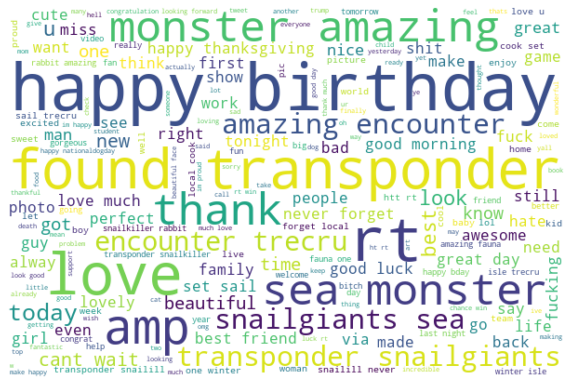

In [ ]:
allwords = ' '.join([i for i in df_clean['detokenized']])
wordcloud = WordCloud(background_color = 'white', width = 600, height = 400, random_state = 22, max_font_size = 100).generate(all_words)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

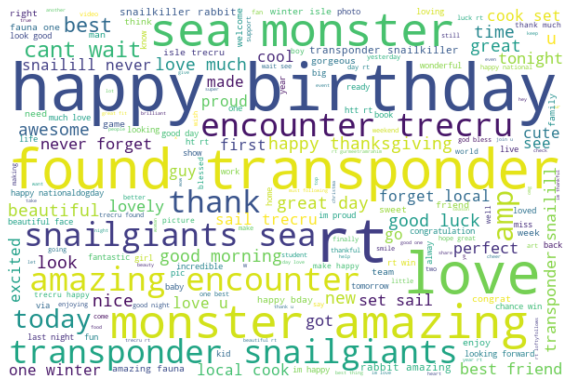

In [ ]:
positive = ' '.join([i for i in df_clean['detokenized'][df_clean['label'] == 1]])
wordcloud = WordCloud(background_color = 'white', width = 600, height = 400, random_state = 22, max_font_size = 100).generate(positive)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

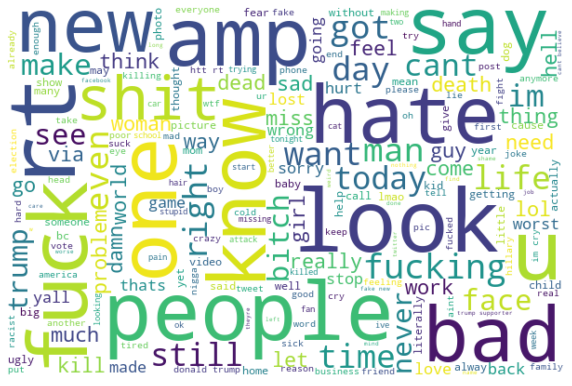

In [ ]:
negative = ' '.join([i for i in df_clean['detokenized'][df_clean['label'] == 0]])
wordcloud = WordCloud(background_color = 'white', width = 600, height = 400, random_state = 22, max_font_size = 100).generate(negative)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

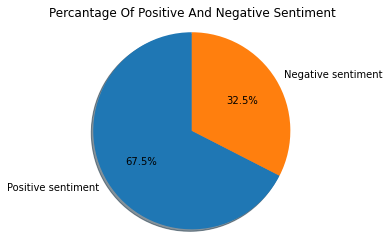

In [ ]:
# Draw a pie chart to show the percentage of positive & negative sentiment and enture an equal aspect ratio for circle
pos_df = df.loc[df_clean['label'] == 1]
neg_df = df.loc[df_clean['label'] == 0]
pos_cnt = pos_df.shape[0]
neg_cnt = neg_df.shape[0]

labels = ['Positive sentiment', 'Negative sentiment']
sizes = [pos_cnt, neg_cnt]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title('Percantage Of Positive And Negative Sentiment')
plt.show()